In [2]:
# following example notebooks from https://github.com/facebookresearch/segment-anything

from segment_anything import build_sam, SamPredictor 
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
using_colab = False
default_checkpt = "model/sam_vit_h_4b8939.pth"

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [7]:
image = cv2.imread('images/breadboard.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

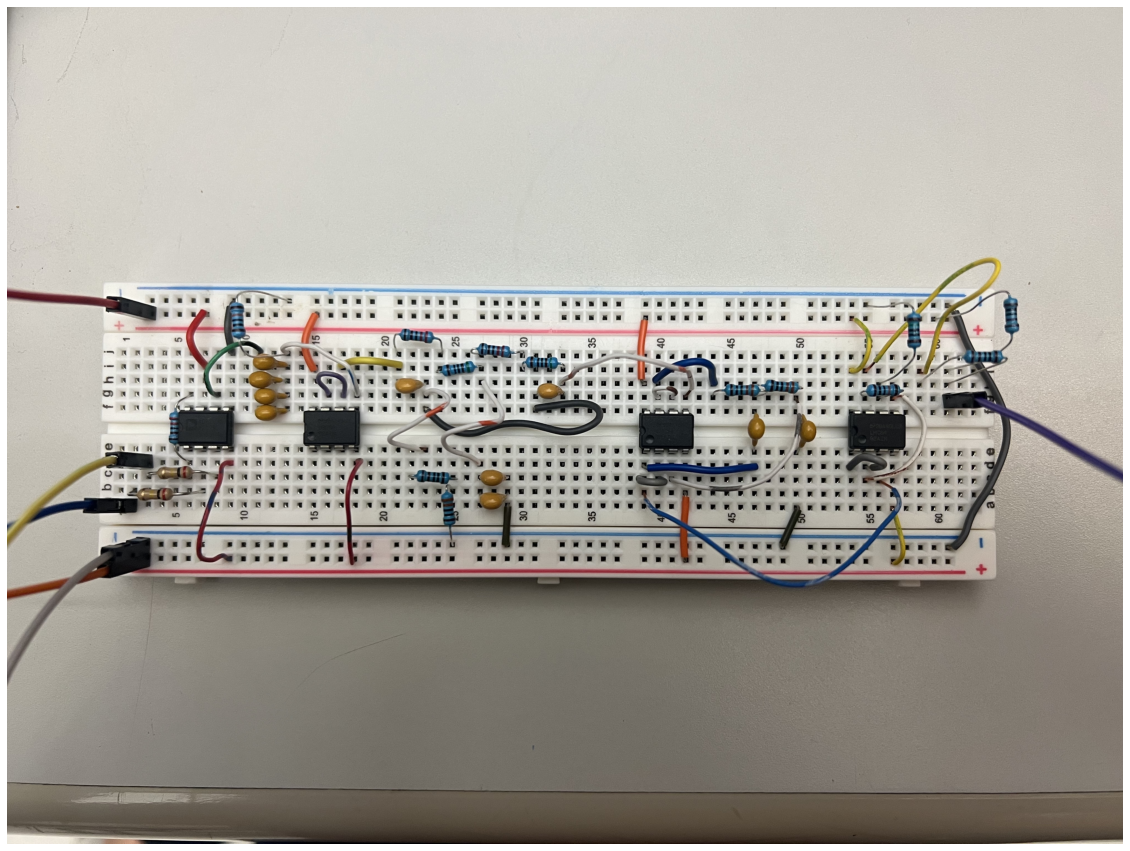

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = default_checkpt
model_type = "vit_h"
device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

mask_generator = SamAutomaticMaskGenerator(sam)

In [17]:
masks = mask_generator.generate(image)

In [18]:
print(len(masks))
print(masks[0].keys())

59
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


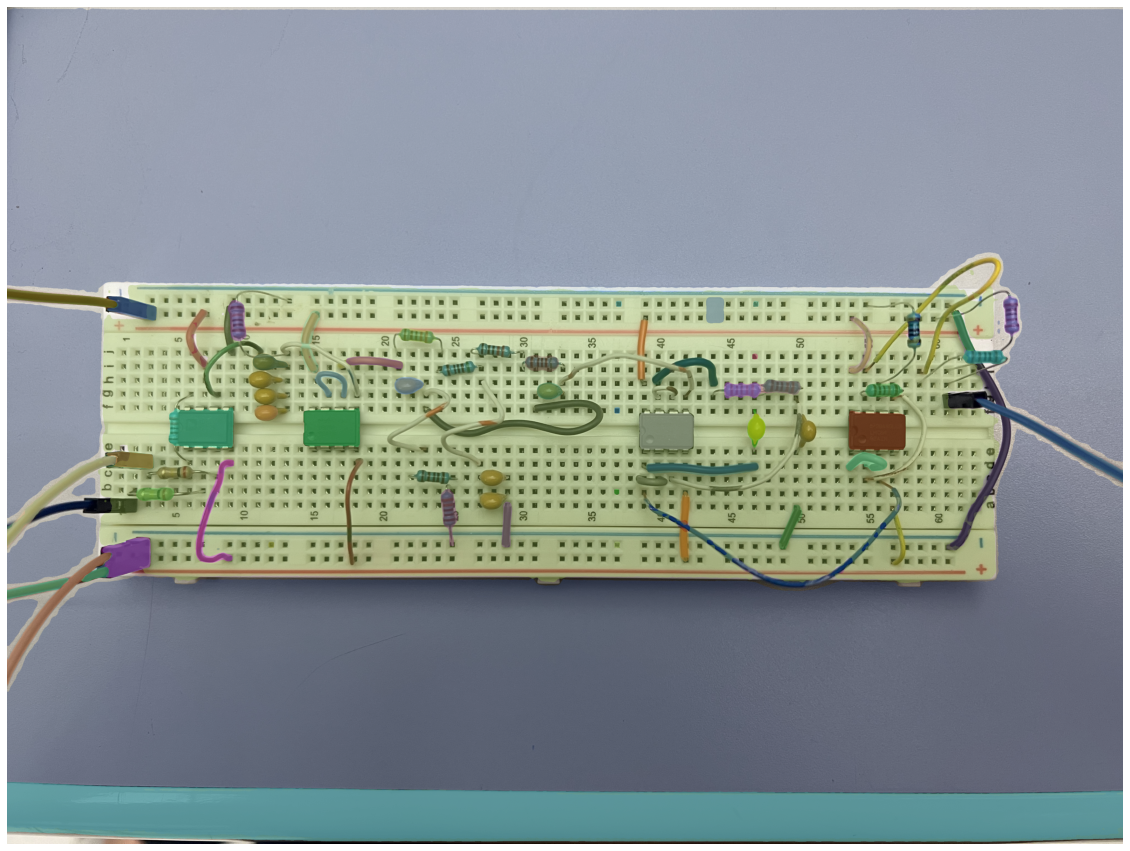

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 